In [56]:
## Libraries:

import math
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

np.set_printoptions(threshold=50, linewidth=100)
import matplotlib as mpl
mpl.rc('font', size=16)

In [57]:
# Imported basketball data from http://www.basketball-reference.com/leagues/NBA_2016_totals.html 
basketball_data = Table.read_table('basketball.csv')
basketball_data.show(30)

Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Quincy Acy,PF,25,SAC,57,29,831,114,200,.570,18,43,.419,96,157,.611,.615,42,56,.750,64,115,179,24,26,21,23,101,288
2,Jordan Adams,SG,21,MEM,2,0,15,2,6,.333,0,1,.000,2,5,.400,.333,3,5,.600,0,2,2,3,3,0,2,2,7
3,Steven Adams,C,22,OKC,78,78,1952,248,409,.606,0,0,nan,248,409,.606,.606,110,188,.585,206,303,509,60,40,86,82,216,606
4,Arron Afflalo,SG,30,NYK,70,57,2345,349,788,.443,88,233,.378,261,555,.470,.499,110,131,.840,23,242,265,142,24,10,81,141,896
5,Alexis Ajinca,C,27,NOP,59,17,861,150,315,.476,0,1,.000,150,314,.478,.476,52,62,.839,75,194,269,31,19,36,54,134,352
6,Cole Aldrich,C,27,LAC,58,4,760,127,218,.583,0,0,nan,127,218,.583,.583,54,78,.692,84,190,274,48,45,62,63,135,308
7,LaMarcus Aldridge,PF,30,SAS,73,73,2242,534,1040,.513,0,16,.000,534,1024,.521,.513,255,296,.861,175,452,627,110,38,80,98,150,1323
8,Cliff Alexander,PF,20,POR,8,0,36,5,10,.500,0,0,nan,5,10,.500,.500,0,0,nan,2,4,6,0,1,2,1,1,10
9,Lavoy Allen,PF,26,IND,77,26,1555,182,353,.516,0,0,nan,182,353,.516,.516,46,73,.630,156,257,413,75,26,41,69,142,410
10,Tony Allen,SF,34,MEM,64,57,1620,215,469,.458,15,42,.357,200,427,.468,.474,90,138,.652,104,192,296,70,110,18,78,175,535


In [58]:
basketball_data['PTS'].tolist()

['288',
 '7',
 '606',
 '896',
 '352',
 '308',
 '1323',
 '10',
 '410',
 '535',
 '829',
 '50',
 '97',
 '13',
 '84',
 '58',
 '156',
 '197',
 '331',
 '1124',
 '1320',
 '6',
 'PTS',
 '1573',
 '11',
 '6',
 '1000',
 '527',
 '231',
 '463',
 '142',
 '321',
 '22',
 '320',
 '34',
 '428',
 '803',
 '304',
 '759',
 '745',
 '1170',
 '473',
 '1040',
 '541',
 '495',
 'PTS',
 '845',
 '958',
 '241',
 '696',
 '28',
 '680',
 '437',
 '287',
 '126',
 '61',
 '231',
 '632',
 '838',
 '371',
 '70',
 '1014',
 '446',
 '1010',
 '1121',
 '70',
 'PTS',
 '586',
 '485',
 '115',
 '20',
 '348',
 '1088',
 '265',
 '216',
 '49',
 '105',
 '679',
 '412',
 '56',
 '1366',
 '124',
 '0',
 '544',
 '1088',
 '846',
 '526',
 '278',
 '383',
 'PTS',
 '623',
 '813',
 '446',
 '628',
 '33',
 '595',
 '472',
 '236',
 '6',
 '1202',
 '477',
 '1035',
 '115',
 '857',
 '33',
 '50',
 '6',
 '4',
 '2',
 '1748',
 '807',
 '816',
 '1120',
 '1023',
 'PTS',
 '457',
 '120',
 '104',
 '16',
 '269',
 '2329',
 '218',
 '1481',
 '517',
 '2',
 '234',
 '79',
 '0

In [ ]:
full_names = ['Rank', 'Player', 'Position', 'Age of Player at the start of February 1st of that season', 'Team', 'Games', 'Games Started', 'Minutes Played', 'Field Goals', 'Field Goal Attempts', 'Field Goal Percentage', '3-Point Field Goals', '3-Point Field Goal Attempts', 'FG% on 3-Pt FGAs', '2-Point Field Goals', '2-point Field Goal Attempts', 'FG% on 2-Pt FGAs', 'Effective Field Goal Percentage', 'Free Throws', 'Free Throw Attempts', 'Free Throw Percentage', 'Offensive Rebounds', 'Defensive Rebounds', 'Total Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers', 'Personal Fouls', 'Points']

original_columns_labels = basketball_data.labels
glossary = Table().with_columns([["Abbreviation", original_columns_labels], ["Full_Name", full_names]])
glossary.show() 

In [ ]:
version_1 = basketball_data.select([glossary.column(0)[0]] + [glossary.column(0)[3]] + glossary.column(0)[5:].tolist())
version_1

In [ ]:
v = version_1
indecestodrop = []
for i in range(v.num_rows):
    if ('nan' in np.array(v.row(i)).tolist() or 'PTS' in np.array(v.row(i)).tolist()):
        indecestodrop += [i]
indecestodrop
version_2 = v.exclude(indecestodrop)


#Have all rows without 'nan' values
version_2

In [ ]:
#Finding duplicate rows:
g = version_2
cache = []
duplicateindeces = []
for i in range(g.num_rows):
    if (g.row(i) in cache):
        duplicateindeces += [i]
    else:
        cache += [g.row(i)]
duplicateindeces


#Remove said indices:
version_3 = version_2.exclude(duplicateindeces)
version_3

In [ ]:
#SAVE TO FILE:
version_3.to_csv("part2.csv")

In [60]:
labels = version_3.labels
for lab in labels:
    #Integer conversion block:
    try:
        newcol = []
        for index in range(version_3.num_rows):
            newcol += [int(version_3.column(lab)[index])]
        version_3 = version_3.with_column(lab, newcol)
    #Float conversion block:
    except:
        newcol = []
        for index in range(version_3.num_rows):
            newcol += [float(version_3.column(lab)[index])]
        version_3 = version_3.with_column(lab, newcol)    

In [61]:
version_3.to_csv("part2.csv")

In [64]:
# function that allows us to compute the correlation
def corr(table, column_A, column_B):
    x = table[column_A]
    y = table[column_B]
    table.scatter(column_A, column_B, s=10, fit_line=True)  
    return np.corrcoef(x,y)

array([[ 1.        , -0.04524196],
       [-0.04524196,  1.        ]])

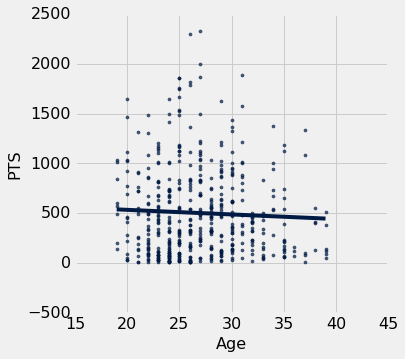

In [65]:
corr(version_3, "Age","PTS")

In [66]:
#helpers:
def correlation(table, column_A, column_B):
    y = table[column_B]
    x = table[column_A]
    return np.corrcoef(x,y)
    

def slope(table, x, y):
    return correlation(table, x, y)[0][1]

def intercept(table, x, y):
    return table[y][0] - slope(table, x, y) * table[x][0]

array([[ 1.        ,  0.86811243],
       [ 0.86811243,  1.        ]])

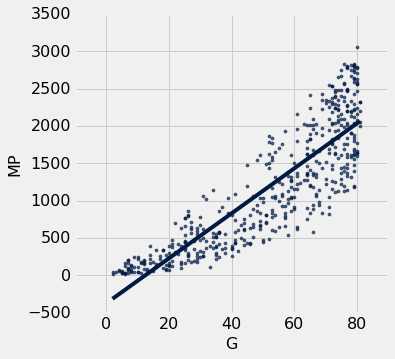

In [67]:
corr(version_3, 'G', 'MP')

In [68]:
def pred_MP(games):
    return games * slope(version_3, 'G', 'MP') + intercept(version_3, 'G', 'MP')

residual = pred_MP(22)
residual

800.61606480929822

In [69]:
version_3.sort('G').select(['Rk', 'G', 'MP'])

Rk,G,MP
2,2,15
230,2,47
208,3,42
102,4,55
209,4,74
23,5,27
177,5,35
230,5,54
457,5,45
84,6,120


In [70]:
#Sum of the residuals is the sum of the errors from the line:

#In other words, for each point, calculate its residual, then sum the difference between that and the empirical value:
games = version_3.sort('G').select(['Rk', 'G', 'MP'])
sum_residuals = 0
for i in range(games.num_rows):
    sum_residuals += abs(pred_MP(i) - games.take(i)[2][0])
    

sum_residuals

307777.72985620482

In [71]:
import numpy as np
import math
from datascience import *

# linalg for optimization and stats model for LS
from numpy.linalg import eigh
import pandas as pd
import statsmodels.api as sm

# plotting
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Correlation coefficient
def corr(table, column_A, column_B):
    x = table[column_A]
    y = table[column_B]
    x_su = (x-np.mean(x))/np.std(x)
    y_su = (y-np.mean(y))/np.std(y)
    return np.mean(x_su*y_su)

# Computes the covariance between two variables
def covariance(table, column_A, column_B):
    x = table[column_A]
    y = table[column_B]
    x_dev = (x-np.mean(x))
    y_dev = (y-np.mean(y))
    return np.mean(x_dev*y_dev)


# Slope and intercept of regression line
def regress(table, column_x, column_y):
    r = corr(table, column_x, column_y)
    reg_slope = r*np.std(table[column_y])/np.std(table[column_x])
    reg_int = np.mean(table[column_y]) - reg_slope*np.mean(table[column_x])
    return np.array([reg_slope, reg_int])

# Fitted value; the regression estimate at x=new_x
def fit(table, column_x, column_y, new_x):
    slope_int = regress(table, column_x, column_y)
    return slope_int[0]*new_x + slope_int[1]

# Fitted values; the regression estimates lie on a straight line
def fitted_values(table, column_x, column_y):
    slope_int = regress(table, column_x, column_y)
    return slope_int[0]*table[column_x] + slope_int[1]

# Residuals: Deviations from the regression line
def residuals(table, column_x, column_y):
    fitted = fitted_values(table, column_x, column_y)
    return table[column_y] - fitted

# Scatter plot with fitted (regression) line
def scatter_fit(table, column_x, column_y):
    plots.scatter(table[column_x], table[column_y], s=10)
    plots.plot(table[column_x], fitted_values(table, column_x, column_y), lw=1, color='green')
    plots.xlabel(column_x)
    plots.ylabel(column_y)
    
# A residual plot
def residual_plot(table, column_x, column_y):
    plots.scatter(table[column_x], residuals(table, column_x, column_y), s=10)
    xm = np.min(table[column_x])
    xM = np.max(table[column_x])
    plots.plot([xm, xM], [0, 0], color='k', lw=1)
    plots.xlabel(column_x)
    plots.ylabel('residual')

# computes a covariance matrix
def covariance_matrix(table):
    cov_matrix = Table().with_column('', table.labels)
    for x in table.labels:
        cov = []
        for y in table.labels:
            cov += [covariance(table, x, y)]
        cov_matrix[x] = cov
    return cov_matrix

In [72]:
basketball = Table().read_table("part2.csv")
basketball

Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,25,57,29,831,114,200,0,18,43,0,96,157,0,0,42,56,0,64,115,179,24,26,21,23,101,288
2,21,2,0,15,2,6,0,0,1,0,2,5,0,0,3,5,0,0,2,2,3,3,0,2,2,7
4,30,70,57,2345,349,788,0,88,233,0,261,555,0,0,110,131,0,23,242,265,142,24,10,81,141,896
5,27,59,17,861,150,315,0,0,1,0,150,314,0,0,52,62,0,75,194,269,31,19,36,54,134,352
7,30,73,73,2242,534,1040,0,0,16,0,534,1024,0,0,255,296,0,175,452,627,110,38,80,98,150,1323
10,34,64,57,1620,215,469,0,15,42,0,200,427,0,0,90,138,0,104,192,296,70,110,18,78,175,535
11,25,81,81,2322,296,713,0,124,344,0,172,369,0,0,113,154,0,97,399,496,138,71,53,119,168,829
13,37,25,13,373,34,65,0,4,12,0,30,53,0,0,25,36,0,34,58,92,12,13,13,8,29,97
13,37,7,1,36,4,10,0,2,5,0,2,5,0,0,3,4,0,3,6,9,3,1,3,2,4,13
13,37,18,12,337,30,55,0,2,7,0,28,48,0,0,22,32,0,31,52,83,9,12,10,6,25,84


In [77]:
basketball_numbers = basketball.drop(0)
basketball_numbers

Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
25,57,29,831,114,200,0,18,43,0,96,157,0,0,42,56,0,64,115,179,24,26,21,23,101,288
21,2,0,15,2,6,0,0,1,0,2,5,0,0,3,5,0,0,2,2,3,3,0,2,2,7
30,70,57,2345,349,788,0,88,233,0,261,555,0,0,110,131,0,23,242,265,142,24,10,81,141,896
27,59,17,861,150,315,0,0,1,0,150,314,0,0,52,62,0,75,194,269,31,19,36,54,134,352
30,73,73,2242,534,1040,0,0,16,0,534,1024,0,0,255,296,0,175,452,627,110,38,80,98,150,1323
34,64,57,1620,215,469,0,15,42,0,200,427,0,0,90,138,0,104,192,296,70,110,18,78,175,535
25,81,81,2322,296,713,0,124,344,0,172,369,0,0,113,154,0,97,399,496,138,71,53,119,168,829
37,25,13,373,34,65,0,4,12,0,30,53,0,0,25,36,0,34,58,92,12,13,13,8,29,97
37,7,1,36,4,10,0,2,5,0,2,5,0,0,3,4,0,3,6,9,3,1,3,2,4,13
37,18,12,337,30,55,0,2,7,0,28,48,0,0,22,32,0,31,52,83,9,12,10,6,25,84


In [78]:
def subtract_means(table):
    means = []
    def getMean(arr):
        return np.mean(arr)

    for col in table.columns:
        means += [getMean(col)]
    return means
means = np.array(subtract_means(basketball_numbers))

In [79]:
def subtract_means(t):
    deviations = t
    index = 0
    for i in np.arange(0, t.num_columns):
        for rowIndex in range(len(t.column(i))):
            deviations.column(i)[rowIndex] = t.column(i)[rowIndex] - means[index]

        index += 1
    return deviations
        
deviations = subtract_means(basketball_numbers)
deviations

Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
-1,5,4,-351,-72,-217,0,-25,-80,0,-46,-136,0,0,-44,-56,0,17,-42,-25,-88,-12,0,-44,3,-214
-5,-49,-24,-1167,-184,-411,0,-43,-122,0,-140,-288,0,0,-83,-107,0,-46,-155,-202,-109,-35,-21,-65,-95,-495
3,18,32,1162,162,370,0,44,109,0,118,261,0,0,23,18,0,-23,84,60,29,-14,-11,13,43,393
0,7,-7,-321,-36,-102,0,-43,-122,0,7,20,0,0,-34,-50,0,28,36,64,-81,-19,14,-13,36,-150
3,21,48,1059,347,622,0,-43,-107,0,391,730,0,0,168,183,0,128,294,422,-2,0,58,30,52,820
7,12,32,437,28,51,0,-28,-81,0,57,133,0,0,3,25,0,57,34,91,-42,71,-3,10,77,32
-1,29,56,1139,109,295,0,80,220,0,29,75,0,0,26,41,0,50,241,291,25,32,31,51,70,326
10,-26,-11,-809,-152,-352,0,-39,-111,0,-112,-240,0,0,-61,-76,0,-12,-99,-112,-100,-25,-8,-59,-68,-405
10,-44,-23,-1146,-182,-407,0,-41,-118,0,-140,-288,0,0,-83,-108,0,-43,-151,-195,-109,-37,-18,-65,-93,-489
10,-33,-12,-845,-156,-362,0,-41,-116,0,-114,-245,0,0,-64,-80,0,-15,-105,-121,-103,-26,-11,-61,-72,-418


In [80]:
deviationMeans = subtract_means(deviations)
#The deviations are all approxiamtely 0, because the mean of an array of deviations is 0 

In [81]:
cov_table = covariance_matrix(deviations)
cov_matrix = np.matrix(cov_table.columns[1:])
cov_table

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Age,15.6749,-2.33614,-0.42835,-102.582,-37.531,-79.2359,0,3.58229,5.79532,0,-41.1431,-85.0799,0,0,-21.3525,-37.1075,0,-18.3605,-25.3797,-44.0173,14.4002,-5.49184,-7.24044,-15.0679,-14.7463,-93.0982
G,-2.33614,540.438,386.596,16540,2741.18,6018.41,0,632.108,1759.12,0,2099.88,4249.55,0,0,1285.55,1665.52,0,682.732,2283.27,2975.44,1578.31,540.62,319.071,944.899,1270.53,7430.66
GS,-0.42835,386.596,753.697,18743.1,3551.67,7630.99,0,721.113,1952,0,2820.08,5668.41,0,0,1815.98,2345.7,0,831.597,2813.23,3656.45,2101.42,664.657,425.284,1206.27,1281.47,9679.6
MP,-102.582,16540,18743.1,672787,121372,265837,0,27695,76146.5,0,93282.7,189284,0,0,61383.7,78351.5,0,25326.8,92458,118150,73375.2,23228.3,12491.6,41631.6,46395.8,333218
FG,-37.531,2741.18,3551.67,121372,25731.5,55338.9,0,5265.47,14229.2,0,20394.1,41033,0,0,13428.2,16878.2,0,4865.17,17640,22574.3,14506.3,4234.95,2414.73,8448.75,8019.91,70436.5
FGA,-79.2359,6018.41,7630.99,265837,55338.9,121760,0,12494.8,34140.6,0,42676.7,87441.9,0,0,29258.4,36238.6,0,9269.82,36446.9,45853.2,32658.6,9384.42,4639.85,18571.2,17295.5,153050
FG%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3P,3.58229,632.108,721.113,27695,5265.47,12494.8,0,2502.15,6558.72,0,2736.29,5909.82,0,0,2632.93,2932.29,0,54.8123,2523.75,2582.23,3458.95,1051.09,107.224,1739.53,1593.74,15737.2
3PA,5.79532,1759.12,1952,76146.5,14229.2,34140.6,0,6558.72,17572.2,0,7597.78,16496.3,0,0,7304.12,8195.35,0,218.734,7016.04,7246.14,9529.42,2896.41,334.291,4823.41,4427.18,42514
3P%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
cov_matrix.T == cov_matrix

matrix([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ..., 
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [83]:
variance = cov_table['G'][1]
variance ** (1/2)

23.247330555619811

In [85]:
variance ** (1/2) ==  np.std(deviations['G'])

True

In [86]:
cov_matrix

matrix([[  1.56749456e+01,  -2.33614149e+00,  -4.28350344e-01, ...,  -1.50678759e+01,
          -1.47462778e+01,  -9.30981969e+01],
        [ -2.33614149e+00,   5.40438378e+02,   3.86596157e+02, ...,   9.44899156e+02,
           1.27053211e+03,   7.43066435e+03],
        [ -4.28350344e-01,   3.86596157e+02,   7.53697021e+02, ...,   1.20626948e+03,
           1.28146734e+03,   9.67960182e+03],
        ..., 
        [ -1.50678759e+01,   9.44899156e+02,   1.20626948e+03, ...,   3.51490143e+03,
           2.86689721e+03,   2.35337531e+04],
        [ -1.47462778e+01,   1.27053211e+03,   1.28146734e+03, ...,   2.86689721e+03,
           4.03645617e+03,   2.17266884e+04],
        [ -9.30981969e+01,   7.43066435e+03,   9.67960182e+03, ...,   2.35337531e+04,
           2.17266884e+04,   1.96322295e+05]])

In [88]:
big5 = basketball_numbers.select(['MP','PTS', 'TRB', 'AST', 'STL', 'BLK'])
big5

MP,PTS,TRB,AST,STL,BLK
-1533,-716,-229,-200,-50,-21
-2349,-997,-406,-221,-73,-42
-20,-109,-144,-83,-52,-32
-1503,-652,-140,-193,-57,-7
-123,317,217,-114,-38,36
-745,-470,-113,-154,32,-24
-43,-176,86,-87,-6,9
-1991,-907,-316,-212,-63,-29
-2328,-991,-399,-221,-75,-39
-2027,-920,-325,-215,-64,-32


In [89]:
big5deviations = subtract_means(big5)
big5deviations

MP,PTS,TRB,AST,STL,BLK
-1559,-767,-253,-1382,-236,-438
-2375,-1048,-430,-1403,-259,-459
-46,-160,-168,-1265,-238,-449
-1529,-703,-164,-1375,-243,-424
-149,265,192,-1296,-224,-381
-771,-521,-137,-1336,-154,-441
-69,-227,61,-1269,-192,-408
-2017,-958,-340,-1394,-249,-446
-2354,-1042,-423,-1403,-261,-456
-2053,-971,-349,-1397,-250,-449


In [90]:
big5covariance = np.array(np.matrix(covariance_matrix(big5deviations).columns[1:]))
big5covariance

array([[  6.72512748e+05,   3.32984454e+05,   1.18008652e+05,   7.33549926e+04,   2.32226837e+04,
          1.24892459e+04],
       [  3.32984454e+05,   1.96112580e+05,   5.95361856e+04,   4.09303731e+04,   1.18452959e+04,
          6.19595622e+03],
       [  1.18008652e+05,   5.95361856e+04,   3.38720144e+04,   1.00636005e+04,   3.83348955e+03,
          4.08587684e+03],
       [  7.33549926e+04,   4.09303731e+04,   1.00636005e+04,   1.58611216e+04,   3.22963307e+03,
          7.68368661e+02],
       [  2.32226837e+04,   1.18452959e+04,   3.83348955e+03,   3.22963307e+03,   1.10087726e+03,
          3.63047170e+02],
       [  1.24892459e+04,   6.19595622e+03,   4.08587684e+03,   7.68368661e+02,   3.63047170e+02,
          7.46824181e+02]])

In [91]:
eigen = np.linalg.eig(big5covariance)
eigen

(array([  8.74122724e+05,   2.55563392e+04,   1.42613484e+04,   5.79825973e+03,   2.49688965e+02,
          2.17804958e+02]),
 array([[-0.873512  , -0.44389265, -0.17968117,  0.08366697,  0.02054382, -0.01511835],
        [-0.44929   ,  0.86889661,  0.11712813,  0.17154946, -0.0015642 ,  0.00255029],
        [-0.15590772, -0.12666302,  0.89364692, -0.37624519, -0.09371318, -0.1034497 ],
        [-0.09804223,  0.17735005, -0.36808925, -0.90228359,  0.08548558, -0.04496141],
        [-0.03038592,  0.00258686, -0.03791179, -0.08352546, -0.72817107,  0.67854484],
        [-0.01650683, -0.02178839,  0.13588179, -0.03029857,  0.67324027,  0.72568483]]))

In [92]:
##PCA:
ev = eigen[1][0:2]
mat = np.matrix(ev)
matt = mat.T

featurevector = np.matrix(matt)
eigenvec2 = featurevector
eigenvec2

matrix([[-0.873512  , -0.44929   ],
        [-0.44389265,  0.86889661],
        [-0.17968117,  0.11712813],
        [ 0.08366697,  0.17154946],
        [ 0.02054382, -0.0015642 ],
        [-0.01511835,  0.00255029]])

In [93]:
evall = eigen[1][:]
matall = np.matrix(evall)
mattall = matall.T

featurevectorall = np.matrix(mattall)
featurevectorall

matrix([[-0.873512  , -0.44929   , -0.15590772, -0.09804223, -0.03038592, -0.01650683],
        [-0.44389265,  0.86889661, -0.12666302,  0.17735005,  0.00258686, -0.02178839],
        [-0.17968117,  0.11712813,  0.89364692, -0.36808925, -0.03791179,  0.13588179],
        [ 0.08366697,  0.17154946, -0.37624519, -0.90228359, -0.08352546, -0.03029857],
        [ 0.02054382, -0.0015642 , -0.09371318,  0.08548558, -0.72817107,  0.67324027],
        [-0.01511835,  0.00255029, -0.1034497 , -0.04496141,  0.67854484,  0.72568483]])

In [94]:
feature_vector_transpose = np.array(featurevector.T)
feature_vector_transpose

array([[-0.873512  , -0.44389265, -0.17968117,  0.08366697,  0.02054382, -0.01511835],
       [-0.44929   ,  0.86889661,  0.11712813,  0.17154946, -0.0015642 ,  0.00255029]])

In [95]:
mean_adjusted_data_transpose = big5deviations.columns
mean_adjusted_data_transpose

(array([-1559, -2375,   -46, ..., -1357,    14,  -630]),
 array([ -767, -1048,  -160, ...,  -663,    44,  -421]),
 array([-253, -430, -168, ..., -335,  225,   17]),
 array([-1382, -1403, -1265, ..., -1372, -1272, -1335]),
 array([-236, -259, -238, ..., -239, -152, -207]),
 array([-438, -459, -449, ..., -452, -423, -398]))

In [96]:
final_data = np.matmul(feature_vector_transpose, mean_adjusted_data_transpose)
final_data.shape

(2, 502)

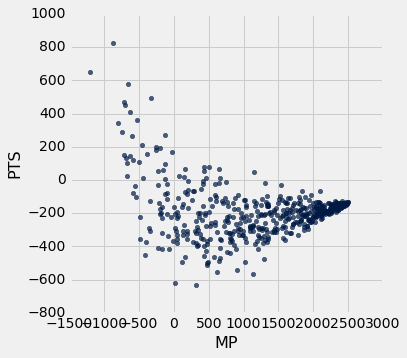

In [98]:
final_table = Table().with_columns([["MP", final_data[0]], ["PTS", final_data[1]]])
final_table.scatter(0)

In [99]:
fullvector = np.matmul(eigenvec2, final_data)
fullvector.shape

(6, 502)

In [100]:
def subtract_means2(table):
    means = []
    def getMean(arr):
        return np.mean(arr)

    for col in table.columns:
        means += [getMean(col)]
    return means
column_means = np.array(subtract_means2(big5))
column_means

array([-1208.05776892,  -553.51394422,  -228.47609562, -1293.9561753 ,  -223.85458167,
        -437.63944223])

In [101]:
def processed(feature_vector, final_data, original_table):
    processed = []
    processed = feature_vector * final_data    
    for i in range(6):
        processed[i] = processed[i] + column_means[i]
    return processed.T

        
processed_data = processed(eigenvec2, final_data, big5)
processed_data

matrix([[-2530.3753265 , -1481.63489582,  -549.39794419, -1197.30522043,  -189.92335286,
          -462.93634968],
        [-3332.14873671, -1781.42585214,  -693.76408165, -1107.90102901,  -172.25687947,
          -475.79997018],
        [-1080.90669652,  -879.30584794,  -276.88142383, -1351.8629121 ,  -222.52863206,
          -439.11307025],
        ..., 
        [-2345.91697895, -1397.01800739,  -513.196535  , -1216.04119863,  -194.16073847,
          -459.82965436],
        [ -982.66919019,  -615.36246195,  -215.79980936, -1336.20412669,  -227.20529329,
          -435.39855566],
        [-1613.81745508, -1100.36187345,  -376.99907176, -1294.99195253,  -210.54537205,
          -447.86819666]])

In [102]:
##LS:

In [103]:
basketball_df = basketball_numbers.to_df()

In [104]:
basketball_df.columns

Index(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [105]:
x = basketball_df[['MP']]
y = basketball_df['PTS']
x = sm.add_constant(x)
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     2638.
Date:                Sat, 27 Aug 2016   Prob (F-statistic):          1.53e-201
Time:                        13:05:14   Log-Likelihood:                -3310.4
No. Observations:                 502   AIC:                             6625.
Df Residuals:                     500   BIC:                             6633.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         83.0036     13.875      5.982      0.000        55.744   110.263
MP             0.4953      0.010     51.357      0.000         0.476     0.514
==============================================================================
Omnibus:                      160.335   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              876.875
Skew:                           1.285   Prob(JB):                    3.88e-191
Kurtosis:                       8.943   Cond. No.                     2.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
from pandas.stats.api import ols

In [107]:
import statsmodels.formula.api as sm1
result = sm1.ols(formula="AST ~ MP + GS", data=basketball_df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AST   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     255.0
Date:                Sat, 27 Aug 2016   Prob (F-statistic):           5.14e-77
Time:                        13:05:15   Log-Likelihood:                -2963.2
No. Observations:                 502   AIC:                             5932.
Df Residuals:                     499   BIC:                             5945.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     14.8397      7.301      2.032      0.043         0.495    29.185
MP             0.1022      0.009     11.715      0.000         0.085     0.119
GS             0.2473      0.261      0.949      0.343        -0.265     0.759
==============================================================================
Omnibus:                      277.114   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2547.044
Skew:                           2.248   Prob(JB):                         0.00
Kurtosis:                      13.077   Cond. No.                     2.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
result = sm1.ols(formula="TOV ~ AST + G + PTS", data=basketball_df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TOV   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1782.
Date:                Sat, 27 Aug 2016   Prob (F-statistic):          8.78e-266
Time:                        13:05:16   Log-Likelihood:                -2143.6
No. Observations:                 502   AIC:                             4295.
Df Residuals:                     498   BIC:                             4312.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.1251      1.932      0.582      0.561        -2.671     4.921
AST            0.2288      0.009     25.232      0.000         0.211     0.247
G              0.1840      0.048      3.818      0.000         0.089     0.279
PTS            0.0652      0.003     20.795      0.000         0.059     0.071
==============================================================================
Omnibus:                       58.691   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.708
Skew:                           0.354   Prob(JB):                     2.03e-63
Kurtosis:                       6.647   Cond. No.                     1.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
result = sm1.ols(formula="PTS ~ GS + G + Age + TOV + MP", data=basketball_df).fit()
result.summary()

#Discovered that points are highly negatively correlated with GS, G, Age, TOV and MP.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     869.2
Date:                Sat, 27 Aug 2016   Prob (F-statistic):          9.87e-243
Time:                        13:05:17   Log-Likelihood:                -3199.5
No. Observations:                 502   AIC:                             6411.
Df Residuals:                     496   BIC:                             6436.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -52.6075     44.825     -1.174      0.241      -140.679    35.464
GS            -0.1613      0.462     -0.349      0.727        -1.069     0.746
G             -4.1592      0.619     -6.715      0.000        -5.376    -2.942
Age           -1.0926      1.615     -0.676      0.499        -4.266     2.081
TOV            2.7542      0.214     12.888      0.000         2.334     3.174
MP             0.4314      0.029     14.626      0.000         0.373     0.489
==============================================================================
Omnibus:                       65.506   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              397.985
Skew:                           0.344   Prob(JB):                     3.79e-87
Kurtosis:                       7.308   Cond. No.                     1.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
x = basketball_df[['MP']]
z = basketball_df['TOV']
w = sm.add_constant(z)
est = sm.OLS(x, w).fit()
est.summary()

#It makes a lot of sense to me that turnovers and minutes playes are highly negatively correlated.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     MP   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     1372.
Date:                Sat, 27 Aug 2016   Prob (F-statistic):          1.91e-145
Time:                        13:05:21   Log-Likelihood:                -3749.2
No. Observations:                 502   AIC:                             7502.
Df Residuals:                     500   BIC:                             7511.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -393.1352     28.511    -13.789      0.000      -449.151  -337.119
TOV           11.8443      0.320     37.042      0.000        11.216    12.473
==============================================================================
Omnibus:                       22.236   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.301
Skew:                           0.386   Prob(JB):                     2.63e-07
Kurtosis:                       3.924   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
gs = basketball_df[['FTA']]
mp = basketball_df['FT']
mp = sm.add_constant(mp)
est = sm.OLS(gs, mp).fit()
est.summary()

#Clearly, free throws and free throws attempted are correlated!

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FTA   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                 1.095e+04
Date:                Sat, 27 Aug 2016   Prob (F-statistic):               0.00
Time:                        13:05:28   Log-Likelihood:                -2338.3
No. Observations:                 502   AIC:                             4681.
Df Residuals:                     500   BIC:                             4689.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -5.0125      1.532     -3.271      0.001        -8.023    -2.002
FT             1.2386      0.012    104.652      0.000         1.215     1.262
==============================================================================
Omnibus:                      720.318   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148936.888
Skew:                           7.542   Prob(JB):                         0.00
Kurtosis:                      86.024   Cond. No.                         174.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""